In [46]:
# Load up all the files into generators
import os
from os.path import join

base_dir = "./cats_and_dogs_filtered"

train_dir = join(base_dir, "train")
validation_dir = join(base_dir, "validation")

train_cats_dir = join(train_dir, "cats")
train_dogs_dir = join(train_dir, "dogs")

validation_cats_dir = join(validation_dir, "cats")
validation_dogs_dir = join(validation_dir, "dogs")

In [47]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [48]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [49]:
# Look at a few pictures to get a feel

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Index for iterating over images

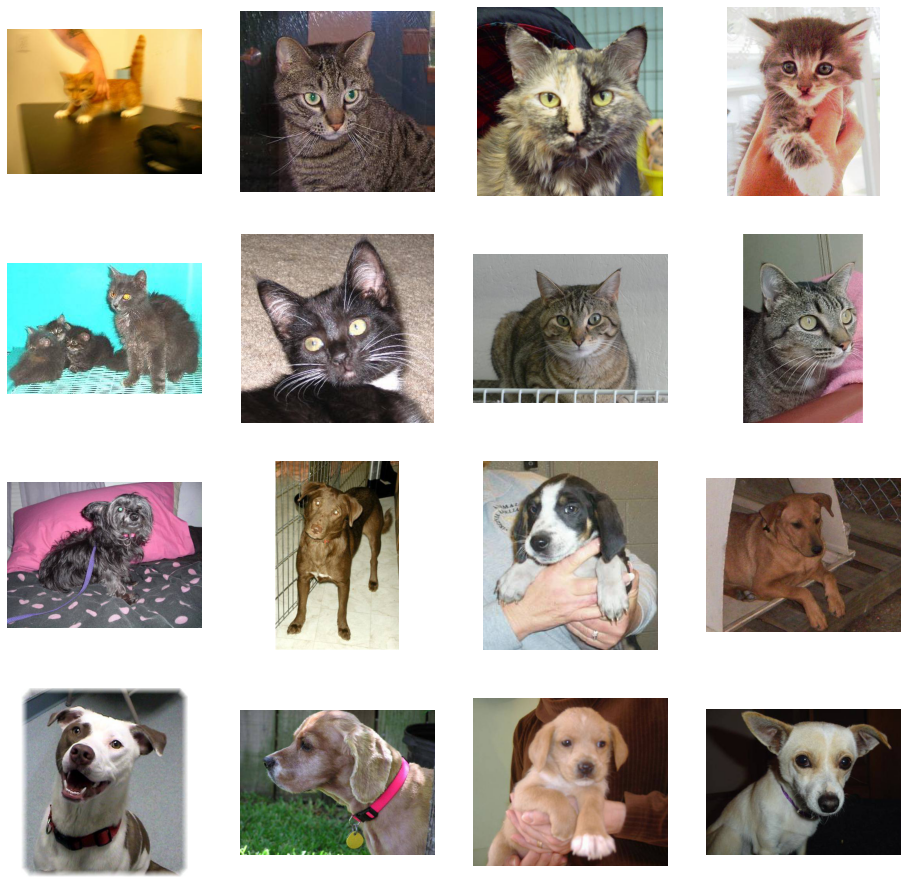

In [50]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index - 8:pic_index]
                ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index - 8:pic_index]
                ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [51]:
import tensorflow as tf

In [52]:
model = tf.keras.models.Sequential([
    # note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18496)           

In [53]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1 / 255.)
test_datagen = ImageDataGenerator(rescale=1 / 255.)

# --------------------
# flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)
# --------------------
# flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=50,
    steps_per_epoch=100,
    epochs=15,
    batch_size=128
)

Epoch 1/15
100/100 [==============================] - 19s 189ms/step - loss: 1.0645 - accuracy: 0.5380 - val_loss: 0.6629 - val_accuracy: 0.6300
Epoch 2/15
100/100 [==============================] - 19s 185ms/step - loss: 0.6712 - accuracy: 0.6320 - val_loss: 0.6280 - val_accuracy: 0.6830
Epoch 3/15
100/100 [==============================] - 19s 189ms/step - loss: 0.5805 - accuracy: 0.6935 - val_loss: 0.5768 - val_accuracy: 0.6970
Epoch 4/15
100/100 [==============================] - 19s 188ms/step - loss: 0.5008 - accuracy: 0.7645 - val_loss: 0.5591 - val_accuracy: 0.7310
Epoch 5/15
100/100 [==============================] - 19s 192ms/step - loss: 0.4184 - accuracy: 0.8080 - val_loss: 0.5832 - val_accuracy: 0.7300
Epoch 6/15
100/100 [==============================] - 19s 187ms/step - loss: 0.3436 - accuracy: 0.8530 - val_loss: 0.7148 - val_accuracy: 0.7160
Epoch 7/15
100/100 [==============================] - 19s 190ms/step - loss: 0.2538 - accuracy: 0.8920 - val_loss: 0.9457 - val_ac

In [56]:
# use the model to predict on unseen images (place them in a directory "/test_new_images)
# not very good performance :(

# the problem here is that the model has overfit to the training images and does not generalize well. the technique of augmentation
# will be explored as a solution to this problem

import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("./test_new_images")

print(images)

for i in images:
    print()
    # predicting images
    path = './test_new_images/' + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")

['cat_1.jpg', 'cat_2.jpg', 'cat_3.jpg', 'dog_1.jpg', 'dog_2.jpg', 'wild_dogs_curveball.jpg']

[0.]
cat_1.jpg is a cat

[0.]
cat_2.jpg is a cat

[0.]
cat_3.jpg is a cat

[1.]
dog_1.jpg is a dog

[1.]
dog_2.jpg is a dog

[1.]
wild_dogs_curveball.jpg is a dog


C:\Users\benja\AppData\Local\Temp/ipykernel_21492/1329387758.py:56: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


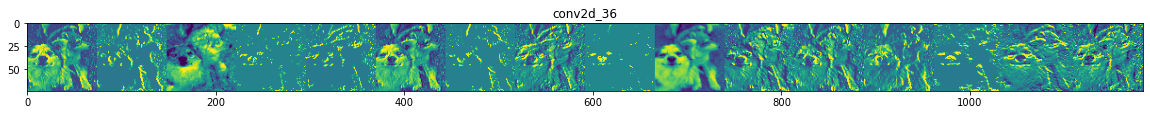

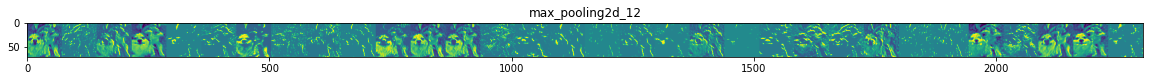

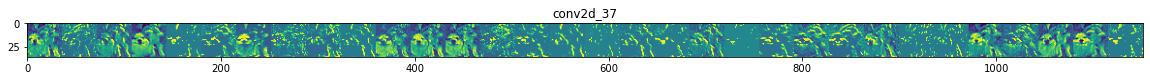

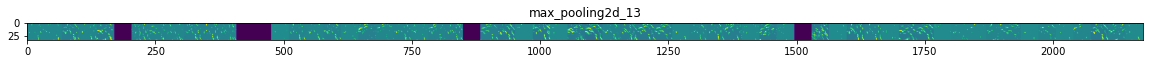

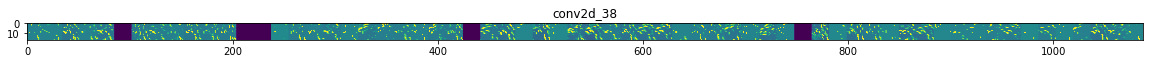

In [61]:
# visualize intermediate results
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size: (i + 1) * size] = x  # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

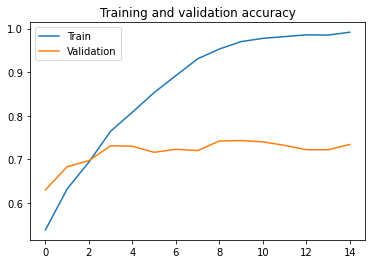

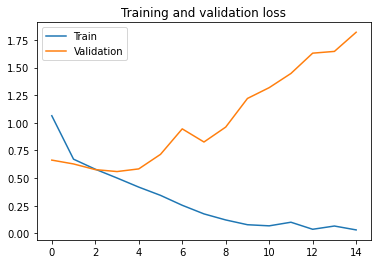

In [58]:
# evaluating accuracy and loss for the model

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
# we can see that overfitting starts to set on quite rapidly
#------------------------------------------------
plt.plot(epochs, loss, label="Train")
plt.plot(epochs, val_loss, label="Validation")
plt.legend()
plt.title('Training and validation loss')